Accuracy: 0.8983425414364641
              precision    recall  f1-score   support

          no       0.91      0.98      0.95       807
         yes       0.59      0.19      0.29        98

    accuracy                           0.90       905
   macro avg       0.75      0.59      0.62       905
weighted avg       0.88      0.90      0.87       905



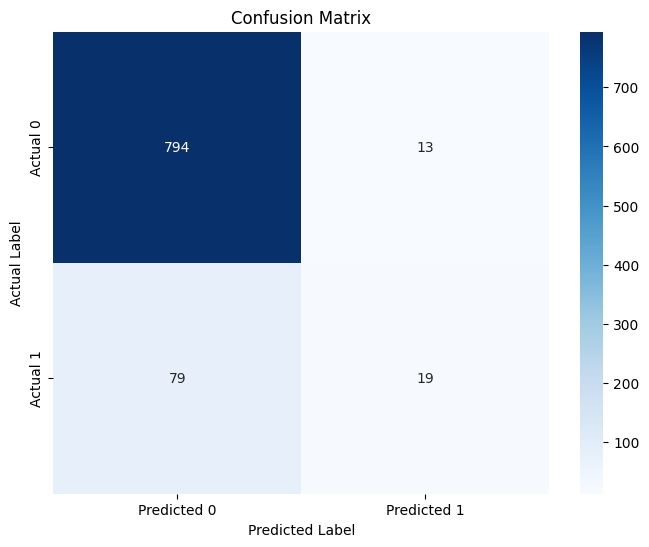

In [ ]:
# prompt: using the dataset find out whether the person is credit worthy or not . The target column to be predicted is y

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    data = pd.read_csv('credit_worthiness_data.csv')
except FileNotFoundError:
    print("Error: credit_worthiness_data.csv not found. Please upload the file.")
    exit()

# Data preprocessing (example: handle missing values, encode categorical features)
# This is a placeholder, adapt it to your actual data
# Identify columns with missing values
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

# Fill missing values (example: fill numerical columns with the mean and categorical columns with the most frequent value)
for col in cols_with_missing:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

# Assuming 'y' is the target variable
y = data['y']
X = data.drop('y', axis=1)


# Convert non-numerical columns to numerical using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42) # Setting random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the test seta
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


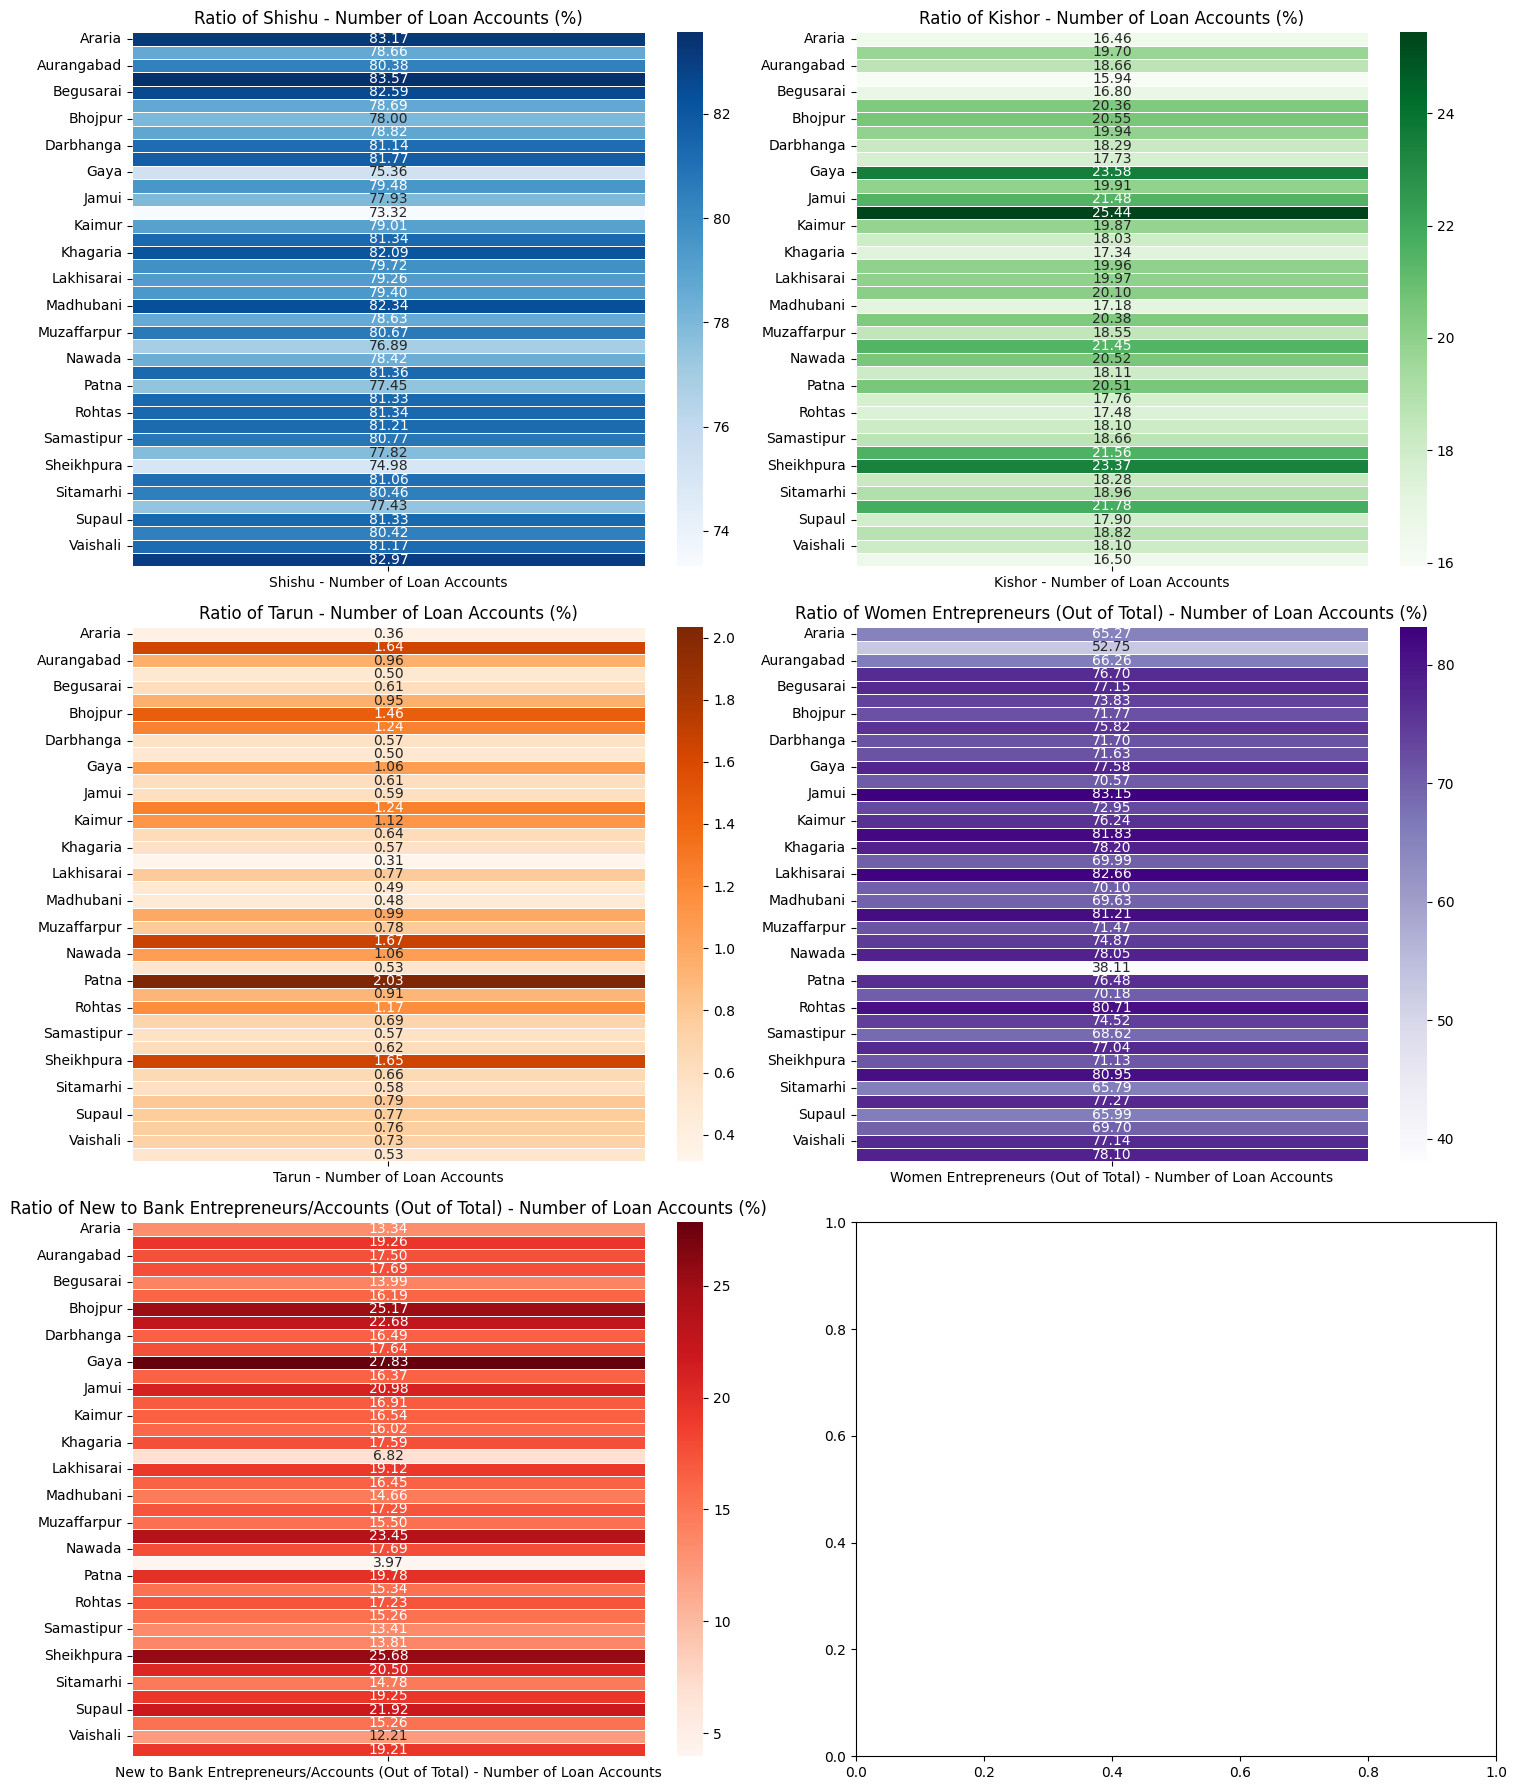

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/content/sample_data/bihar.csv"
df = pd.read_csv(file_path)

# Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Select relevant columns for heatmap
selected_columns = [
    "Total - Number of Loan Accounts",
    "Shishu - Number of Loan Accounts",
    "Kishor - Number of Loan Accounts",
    "Tarun - Number of Loan Accounts",
    "Women Entrepreneurs (Out of Total) - Number of Loan Accounts",
    "New to Bank Entrepreneurs/Accounts (Out of Total) - Number of Loan Accounts"
]

# Aggregate data by district
heatmap_data = df.groupby("District")[selected_columns].sum()

# Convert to ratio (each loan type / total loans in that district)
heatmap_data_ratio = heatmap_data.div(heatmap_data["Total - Number of Loan Accounts"], axis=0) * 100
heatmap_data_ratio = heatmap_data_ratio.drop(columns=["Total - Number of Loan Accounts"])

# Define different color maps for each category
colormap_dict = {
    "Shishu - Number of Loan Accounts": "Blues",
    "Kishor - Number of Loan Accounts": "Greens",
    "Tarun - Number of Loan Accounts": "Oranges",
    "Women Entrepreneurs (Out of Total) - Number of Loan Accounts": "Purples",
    "New to Bank Entrepreneurs/Accounts (Out of Total) - Number of Loan Accounts": "Reds"
}

# Plot heatmaps for each category with different color schemes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, column in enumerate(heatmap_data_ratio.columns):
    ax = axes[i]
    sns.heatmap(heatmap_data_ratio[[column]], cmap=colormap_dict[column], annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title(f"Ratio of {column} (%)")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()
